*Autorska implementacja algorytmów opisanych w materiałach "Metody Optymalizacji" autorstwa Michała Lewandowskiego dostępnych pod linkiem:
http://akson.sgh.waw.pl/~mlewan1/Site/MO_files/mo_skrypt_21_12.pdf*

In [68]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Algorytmy optymalizacji

## Algorytmy optymalizacji funkcji jednej zmiennej

### Wyróżnia się dwa podstawowe typy algorytmów:

- **Metody bezpośrednich poszukiwań (ang. direct search methods)**
Metody bezpośrednich poszukiwań wykorzystują wyłącznie wartości funckji
celu

- **Metody oparte na gradientach (ang. gradient-based methods)**
Metody oparte na gradientach wykorzystują rownież pochodne pierwszego i/lub drugiego rzędu funkcji celu. Ponieważ gradienty liczymy  numerycznie, funkcja celu nie musi być rożniczkowalna ani nawet ciągła, aby wykorzystywać metody gradientowe


Poniższe metody zakładają, że funkcja celu jest **unimodalna** (*ang. unimodal function*), czyli taka, że ma tylko jedno minimum lokalne. W praktyce, dzieli się funkcję na przedziały, w których jest ona unimodalna i dla każdego takiego przedziału z osobna, znajduje się minimum. 

### Minimum funkcji znajduje się w dwóch fazach:

1.  Metody ustalania przedziału, w którym znajduje się minimum (*ang. bracketing methods*)

2.  Metody znajdowania minimum z zadaną dokładnością:

    a) **Metody eliminowania obszarów** (*ang. region elimination methods*)

    b) **Metoda estymacji punktowej** (*ang. point estimation method*)

    b) **Metody oparte na gradientach** (*ang. gradient based methods*)

# Przykładowy wielomian:

In [2]:
def f(x):
    return -1720 + -700 * x**3 + 0.1 * x**4
    #return (x - 1) * (x + 2) * (x + 1) * (x + 20)

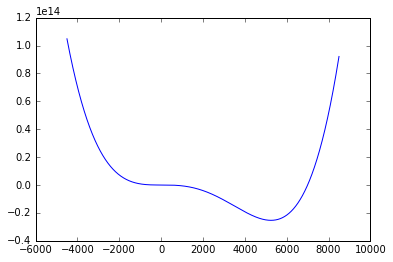

In [3]:
#a, b = -30, 20
a, b = -4500, 8500
n = 10000
x = np.linspace(a, b, num=n)
y = np.vectorize(f)
plt.plot(x, f(x))

# Metody ustalania przedziału, w którym znajduje się minimum

#### Metoda wyczerpującego poszukiwania
(*ang. exhaustive search method*)

Metoda ta polega na porównywaniu wartości funkcji celu dla punktów jednakowo
od siebie odległych. Zazwyczaj poszukiwania zaczyna się od dolnego
ograniczenia zmiennej i w pojednynczej iteracji porównuje się wartości
trzech kolejnych punktów wykorzystując założenie unimodalności.

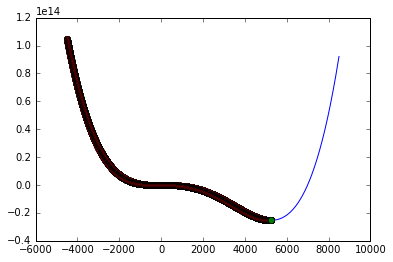

In [4]:
delta_x = (b - a) / float(n)
delta_x = 0.5
x1 = a
x2 = x1 + delta_x
x3 = x2 + delta_x

X_history = [x1, x2, x3]
    
while x3 <= b:
    X = np.array([x1, x2, x3])
    Y = f(X)
    if Y[0] >= Y[1] and Y[1] <= Y[2]:
        break
    x1, x2, x3 = x2, x3, x3 + delta_x
    
    X_history.append(x3)
    
X_history = np.array(X_history)
X = np.array(X)    
plt.plot(x, f(x))
plt.plot(X_history, f(X_history), "ro")
plt.plot(X, f(X), "go")
plt.show()



#### Metoda przyśpieszonego poszukiwania
(*ang. bounding phasemethod*)


Metoda ta polega na obraniu punktu początkowego i wybraniu kierunku poszukiwań na podstawie porównania wartości funkcji w punkcie początkowym oraz dwóch wartości funkcji w punktach będących w bezpośrednim sąsiedztwie punktu początkowego. Później znajduje się drugi kraniec przedziału stosując wykładniczą strategię poszukiwań. Poniżej użyty jest wykładnik równy 2, ale można używa˙c jakąkolwiek inną liczbę dodatnią.

Wykładnik wyższy niż 1, powoduje ’przyspieszanie’ wykładnicze poszukiwań, co zmniejsza liczbę iteracji, ale dzieje się to kosztem uzyskanej dokładności. Dla porównania w metodzie ustalania przedziału uzyskana dokładność jest lepsza, ale ilość potrzebnych iteracji jest większa.

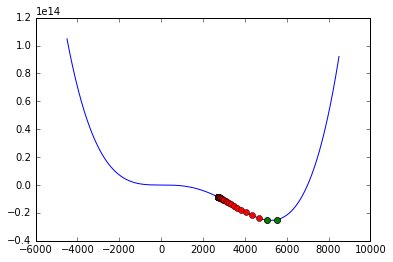

In [5]:
x0 = np.random.randint(a, b)
delta = 0.01
k = 0
A = 1.2

X = [x0]
F = [f(X[k]) + 1, f(X[k])]

while F[-1] < F[-2]:
    if f(X[k] - abs(delta)) >= f(X[k]) and f(X[k]) >= f(X[k] + abs(delta)):
        delta = abs(delta)
    elif f(X[k] - abs(delta)) <= f(X[k]) and f(X[k]) <= f(X[k] + abs(delta)):
        delta = -abs(delta)

    X.append(X[k] + A**k * delta)
    k += 1
    F.append(f(X[k]))
X = np.array(X)

plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-2:], f(X[-2:]), "go")
plt.show()

## Metody znajdowania minimum z zadaną dokładnością
### Metody eliminowania obszarów

Rozważmy dwa punkty $x_1$ i $x_2$, które leżą w przedziale (a, b) oraz $x_1$ < $x_2$. Dla problemu minimalizacji funkcji unimodalnej, można wyciągnąć następujące wnioski:

- Jeśli $f(x_1)$ > $f(x_2)$, to minimum nie leży w $(a, x_1)$

- Jeśli $f(x_1)$ < $f(x_2)$, to minimum nie leży w $(x_2, b)$

- Jeśli $f(x_1) = f(x_2)$, to minimum nie leży ani w $(a, x_1)$ ani w $(x_2, b)$

Poniżej przedstawione zostaną trzy metody:

- Metoda dzielenia przedziału na połowę (*ang. interval halving method*)

- Metoda złotego podziału (*ang. golden section search*)

- Metoda liczb Fibonacciego (*ang. Fibonacci search*)

#### Metody eliminowania obszarów
Metoda ta polega na wybraniu trzech punktów jednakowo odległych od
siebie oraz od krańców przedziału oraz wyliczeniu wartości funkcji w tych punktach, w wyniku czego można wyeliminować połowę przedziału.

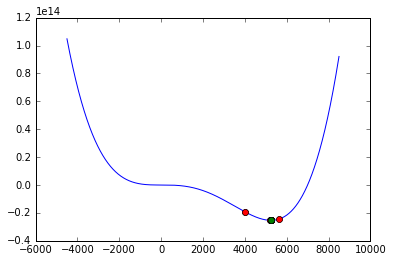

In [6]:
p = a * 2
q = b * 2
epsilon = 0.001

xm = (p + q) / 2.0
L = p - q

X = [xm]
while abs(L) > epsilon:
    x1 = p - L/4.0
    x2 = q + L/4.0
    
    if f(x1) < f(xm):
        q = xm
        xm = x1
    elif f(x2) < f(xm):
        p = xm
        xm = x2
    else:
        p = x1
        q = x2
    X.append(xm)
    L = p - q

X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-2:], f(X[-2:]), "go")
plt.show()

#### Metoda złotego podziału

W metodzie tej w każdej nowej iteracji potrzeba wyliczyć tylko jedną nową wartość funkcji. Idea polega na tym, że spośród dwóch punktów,\ które potrzebne są, aby stosować regułę eliminowania obszarów, jeden punkt jest zawsze poprzednim a tylko drugi punkt jest nowy. Ponadto przedział zawęża się za każdą iteracją proporcjonalnie o tyle samo, czyli o wartość $\rho$, która spełnia następującą zależność:
$$\frac{1-\rho}{1}=\frac{\rho}{1-\rho}\implies \rho = \frac{3-\sqrt{5}}{2} \approx 0.382$$

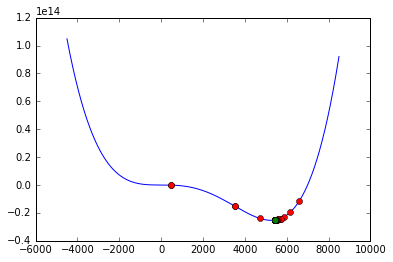

In [7]:
p = a
q = b
epsilon = 0.01
k = 1
rho = 0.382

w1 = p + (1 - rho) * (q - p)
w2 = p + rho * (q - p)
X = [w1, w2]

while abs(p - q) > epsilon:
 
    if k % 2 == 0:
        w1 = p + (1 - rho) * (q - p)
        X.append(w1)
    else:
        w2 = p + rho * (q - p)
        X.append(w2)

    if f(w1) > f(w2):
        q = w1
    elif f(w1) < f(w2):
        p = w2
    else:
        q = w1
        p = w2    
    k += 1
    
X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.plot(X[-1], f(X[-1]), "go")
plt.show()

#### Metoda liczb Fibonacciego
W metodzie złotego podziału proporcja zmniejszania się przedziału z iteracji na iterację pozostaje niezmienna i wynosi 0.618. W metodzie liczb Fibonacciego, idea jest taka sama jak w metodzie złotego podziału, z wyjątkiem faktu, że w metodzie liczb Fibonacciego proporcja zmniejszania się przedziału z iteracji na iterację zmienia się tak, aby przedział zmniejszał się w sposób optymalny (tzn. jak najbardziej). Jeśli $\rho_k$ oznacza proporcje, o jaką zmniejsza się przedział w k-tej iteracji, to w metodzie Fibonacciego zachodzi następujący związek:

$$\frac{1-\rho_{k+1}}{1}=\frac{\rho_k}{1-\rho_k}$$

Okazuję się, że wartość $\rho_k\in(0,1/2]$, gdzie $k = 1,...,N$, które minimalizują wyrażenie $(1-\rho_1)(1-\rho_2)...(1-\rho_N)$ i które spełniają powyższy związek (1), są następujące liczby:
$$\rho_1 = 1-\frac{F_N}{F_{N+1}}$$

$$\rho_2 = 1-\frac{F_{N-1}}{F_{N}}$$
...
$$\rho_2 = 1-\frac{F_{N-k+1}}{F_{N-k+2}}$$
...
$$\rho_2 = 1-\frac{F_1}{F_2}$$
gdzie $F_k$ oznaczają liczby Fibonacciego. Liczby Fibonacciego mają następującą charakterystyke:
$F_1 = 1, F_2= 1$
$$F_k = F_{k-1} + F_{k-2}$$
gdzie $k = 3, 4,...$

In [8]:
F = {}
def fib(n):
    if n in F:
        return F[n]
    if n == 1 or n == 2:
        F[n] = 1
    else:
        F[n] = fib(n-1) + fib(n-2)
    return F[n]

In [9]:
p = a
q = b
epsilon = 0.01

N = 3
value = 1
while value > epsilon:
    value = 2.0 * (q - p) / fib(N+1)
    N+=1

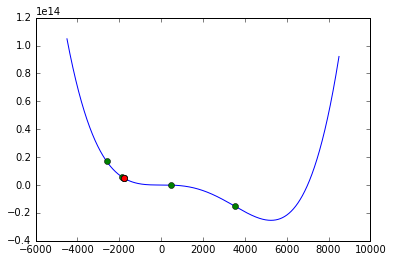

In [10]:
p = a
q = b

n = N

L = F[N-1]/float(F[N])

x1 = q - L * (q - p)
x2 = p + L * (q - p)
X = [x1, x2]

while abs(q - p) > epsilon:
    L = F[n-1]/float(F[N])
    if f(x1) < f(x2):
        q = x2
        x2 = x1
        n -= 1
        x1 = q - F[n-1]/float(F[N]) * (q - p)
        X.append(x1)
    else:
        p = x1
        x1 = x2
        n -= 1
        x2 = p - F[n-1]/float(F[N]) * (q - p)
        X.append(x2)
        

X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "go")
plt.plot(X[-1], f(X[-1]), "ro")
plt.show()

### Metody estymacji punktowej
W poprzednim podrozdziale omawiane były metody, które porównują wartości funkcji. W metodach estymacji punktowej wykorzystuje się również wielkość różnicy wartości funkcji.

#### Metoda interpolacji kwadratowej Powella
Szukamy trzy punkty $x_1 < x_2 < x_3$ takie, że wartości funkcji w tych punktach spełniają $f(x_1) > f(x_2) < f(x_3)$. Szukamy równania wielomianu kwadratowego przechodzącego przez punkty $(x_1, f(x_1)), (x_2, f(x_2))$ i $(x_3, f(x_3))$.

W tym celu zapisujemy ogólne równanie wielomianu kwadratowego przechodzącego przez punkty $x_1$ i $x_2$"

$$q(x)=a_0+a_1(x-x_1)+a_2(x-x_1)(x-x_2)$$

Następnie szukamy współczynników tego wielomianu:

$$q(x_1)=f(x_1)=a_0$$

$$q(x_2)=f(x_2)=a_0 + a_1(x_2-x_1)$$

$$q(x_3)=f(x_3)=a_0 + a_1(x_3-x_1) + a_2(x_3-x_1)(x_3-x_2)$$

Otrzymujemy układ trzech równań, który rozwiązujemy, aby znaleźć współ-
czynniki szukanego wielomianu:

$$a_0 = f(x_1)$$

$$a_1 = \frac{f(x_2)-f(x_1)}{x_2-x_1}$$

$$a_2 = \frac{1}{x_3-x_2}\bigg(\frac{f(x_3)-f(x_1}{x_3-x_1}-\frac{f(x_2)-f(x_1}{x_2-x_1}\bigg)$$

Teraz szukamy argumentu, dla którego ten wielomian kwadratowy osią-
ga minimum. Ponieważ zgodnie z naszymi założeniami $a_2 > 0$, minimum
znajduje się tam, gdzie pochodna równa jest zero.

$$q'(x)=0\implies a_1+a_2(x-x_2+x-x_1)=0\implies x^* = \frac{x_1+x_2}{2}-\frac{a_1}{2a_2}$$

W punkcie $x^*$ wielomian kwadratowy $q(x)$ osiąga minimum. Ponieważ $q(x)$ jest przybliżeniem funkcji $f(x)$, której minimum szukamy, $x^∗$ jest przybliżeniem wartości, w której funkcja $f(x)$ osiąga minimum. Spośród punktów $(x_1, x_2, x_3, x^∗)$, zatrzymujemy trzy najlepsze (innymi słowy wyrzucamy punkt, w którym wartość funkcji $f(x)$ jest największa) i ponownie dokonujemy interpolacji kwadratowej dla tych trzech punktów i szukamy minimum otrzymanego wielomianu. Procedura ta powtarzana jest do momentu, kiedy osiągnięta zostanie żądana dokładność.

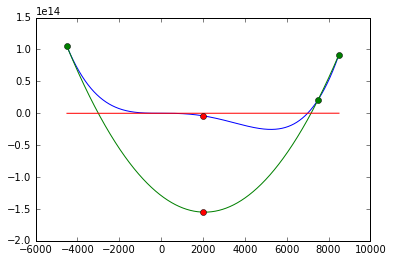

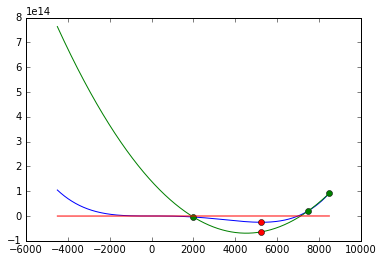

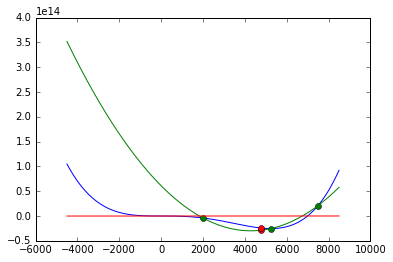

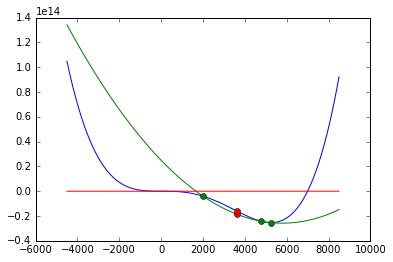

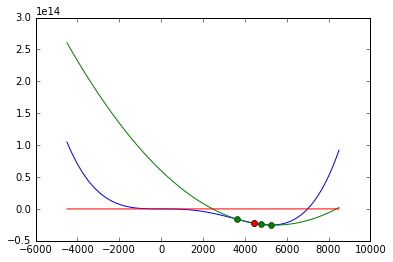

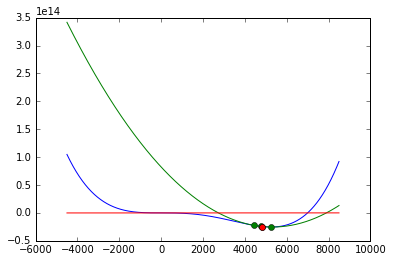

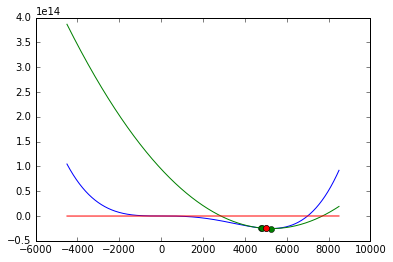

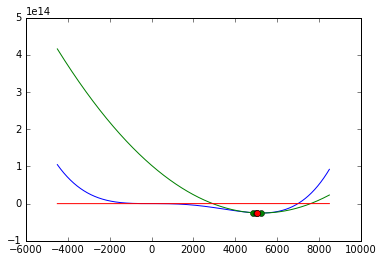

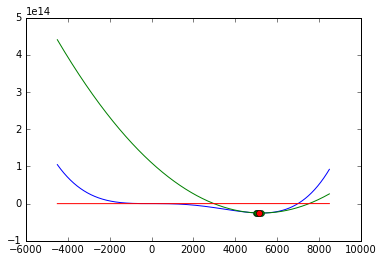

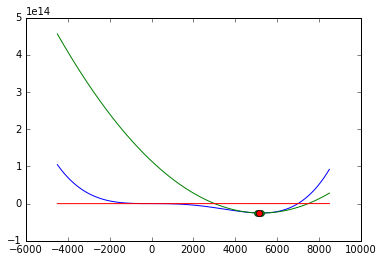

In [11]:
X = np.array([a, b-1000, b])
x2 = np.linspace(a, b, num=n)
def step(X):
    a0 = f(X[0])
    a1 = (f(X[1]) - f(X[0]))/float(X[1] - X[0])
    a2 = 1.0/(X[2] - X[1]) * ((f(X[2]) - f(X[0]))/float(X[2] - X[0]) - a1)

    xs = (X[0]+X[2])/2.0

    def q(x):
        return a0 + a1 * (x - X[0]) + a2 * (x - X[0]) * (x - X[1])
    
    def q2(x):
        return a1 + a2 * (x - X[1] + x - X[0])
   
    X = np.array(X)
    plt.plot(x, f(x))
    plt.plot(X, f(X), "go")
    plt.plot(x, q(x))
    plt.plot(x, q2(x))
    plt.plot(xs, q(xs), "ro")
    plt.plot(xs, f(xs), "ro")
    plt.show()
    
    variables = [X[0], X[1], X[2], xs]
    values = [f(a) for a in variables]
    index = values.index(max(values))
    variables.pop(index)
    return sorted(variables)

for _ in range(10):
    X = step(X)

### Metody oparte na gradientach
Metody opisane dotychczas wykorzystywały tylko wartości funkcji. Metody
oparte na gradientach wykorzystujá natomiast dodatkowo informację o pochodnych funkcji. Gradienty zazwyczaj oblicza się numerycznie. Używając metody różnic centralnych (ang. central difference method), liczymy pierwszą i drugą pochodną w punkcie $x^k$ następująco:

$$f'(x^{(k)}) = \frac{f(x^{(k)}+\Delta x^{(k)}) - f(x^{(k)}-\Delta x^{(k)})}{2 \Delta x^{(k)}}$$

$$f''(x^{(k)}) = \frac{f(x^{(k)}+\Delta x^{(k)}) - 2f(x^{(k)}) + f(x^{(k)}-\Delta x^{(k)})}{(\Delta x^{(k)})^2}$$

Parametr $\Delta x^{(k)}$ powinien być mały, na przykład może stanowić 1% wartości $x^{(k)}$.

#### Metoda Newtona-Raphsona
Załóżmy, że możemy policzyć $f(x^{(k)})$, $f'(x^{(k)})$, $f''(x^{(k)})$ w każdym punkcie pomiaru funkcji $x^{(k)}$. Możemy zdefiniować wielomian kwadratowy, którego pierwsza i druga pochodna oraz wartość w punkcie $x^{(k)}$ są identyczne z tym dla funkcji $f(x)$. Ten wielomian ma następującą postać:
$$q(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)})+\frac{1}{2}f''(x^{(k)})(x-x^{(k)})^2$$

Zamiast minimalizować funkcję $f(x)$ minimalizujemy jej przybliżenie $q(x)$. Warunek pierwszego rzędu na istnienie minimum jest następujący:
$$0 = q'(x) = f'(x^{(k)})+f''(x^{(k)})(x-x^{(k)})$$
Nowy punkt $x=x^{(k+1)}$ spełnia zatem:
$$x^{(k+1)} = x^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$$
Metoda Newtona-Raphsona polega na kontynuowaniu powyższej procedury do momentu, w którym pochodna $f'(x^{(k+1)})$ będzie wystarczająco blisko zera. Jeśli postawimy $g(x)=f'(x)$, wtedy otrzymamy formuję do iteracyjnego poszukiwania rozwiązania równania $g(x)=0$:
$$x^{(k+1)}=x^{(k)}-\frac{g(x^{(k)})}{g'(x^{(k)})}$$
Metoda Newtona-Raphona działa dobrze jeśli $f''(x)>0$ wszędzie. Jeśli natomiast $f''(x)<0$ dla pewnego $x$, algorytm może nie zbiegać do minimum. Jeżeli zamiast analitycznych pochodnych funkcji wykorzystujemy przybliżone pochodne, wówczas algorytm nazywamy quasi-newtonowskim.

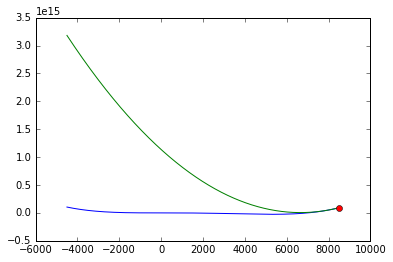

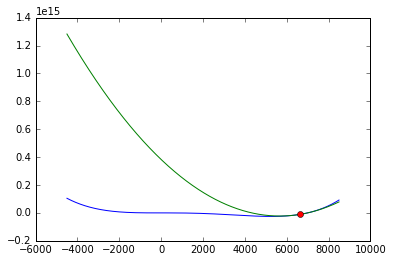

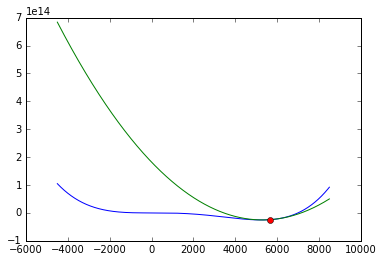

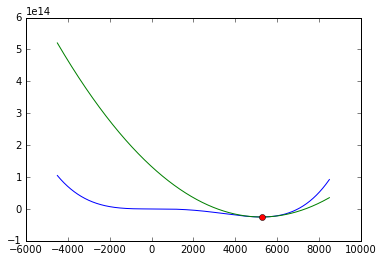

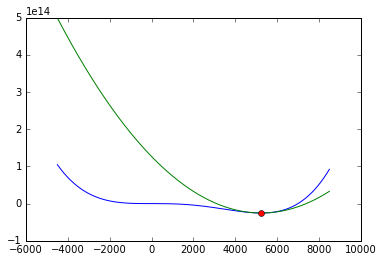

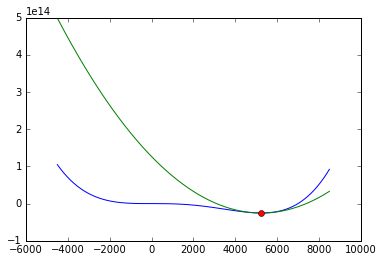

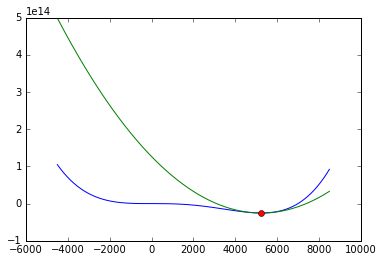

In [12]:
def get_1st_derivative(f, X, delta):
    return (f(X + delta) - f(X - delta)) / 2.0 * delta

def get_2nd_derivative(f, X, delta):
    return (f(X + delta) - 2 * f(X) + f(X - delta)) / delta ** 2

def q(x, f, xk, delta):
    A = f(xk)
    B = get_1st_derivative(f, xk, delta) * (x - xk) 
    C = 0.5 * get_2nd_derivative(f, xk, delta)  * (x - xk) ** 2
    return A + B + C


delta = 1
e = 0.1

X = b
gx = 1

while abs(gx) > e:
    plt.plot(x, f(x))
    plt.plot(x, q(x, f, X, delta))
    plt.plot(X, f(X), "ro")
    plt.show()
    gx = get_1st_derivative(f, X, delta)

    xk = X - gx/get_2nd_derivative(f, X, delta)
    X = xk



#### Metoda siecznych *(ang. secant method)*
Jest to metoda podobna do Newtona-Raphson. Zamiast $f''(x^{(k)})$, używa się nastepującego przybliżenia:
$$\frac{f'(x^{(k)})-f(x^{(k-1)})}{x^{(k)}-x^{(k-1)}}.$$

Otrzymuje się wtedy przedstawiony poniżej algorytm, który nazywany jest metodą siecznych:
$$x^{(k+1)} = x^{(k)} - \frac{x^{(k)}-x^{(k-1)}}{f'(x^{(k)})-f'(x^{(k-1)})}f'(x^{(k)})$$

Metoda siecznych wymaga dwóch punktów startowych $x^{(-1)}$ oraz $x^{(0)}$. Tak samo jak w przypadku metody Newtona-Raphsona, metodę siecznych można wykorzystać do znajdowania pierwiastków równania $g(x)=0$. Otrzymujemy wtedy algorytm:
$$x^{(k+1)} = x^{(k)}-\frac{x^{(k)}-x^{(k-1)}}{g(x^{(k)})-g(x^{(k-1)})}g(x^{(k)})$$

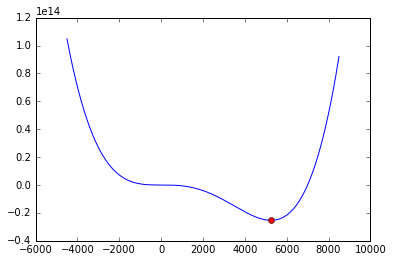

In [13]:
xk = b * 2.0
xkm1 = b * 2.0 + 1.0
e = 0.001
gxk = 1

while gxk > e:
    gxk = get_1st_derivative(f, xk, delta)
    gxm1 = get_1st_derivative(f, xkm1, delta)

    xkp1 = xk - (xk - xkm1)/(gxk - gxm1) * gxk
    
    xkm1 = xk
    xk = xkp1

X = np.array(xk)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.show()

### Porównanie metod znajdowania minimum z zadaną dokładnością
- Jeśli początkowy przedział, w którym leży minimum jest znany, najbardziej efektywną metodą eliminacji obszarów jest metoda liczb Fibonacciego.
- Jeśli nie znamy początkowego przedziału oraz pochodnych funkcji, wówczas najlepsza powinna być metoda iterpolacji kwadratowej Powella lub metoda quasi-newtonowska.
- Gdy pierwsze pochodne są dostępne, metoda siecznych
lub metoda interpolacji sześciennej (Jest to metoda podobna do interpolacji
kwadratowej, używa jednak pierwszych pochodnych funkcji w celu zmniejszenia ilości potrzebnych
wartości funkcji w pojedynczej iteracji.) powinna być najbardziej efektywna.
- Gdy dostępne są informacje i pierwszych i drugich pochodnych funkcji, najbardziej efektywna jest Newtona-Raphsona.

## Algorytmy optymalizacji funkcji wielu zmiennych
Dana jest funkcja wielu zmiennych: $f:I\!R^N\rightarrow I\!R$. Mówimy, że punkt $\bar{x}$ jest punktem stacjonarnym, jeśli gradient w tym punkcie jest zerowym wektorem: $\bigtriangledown f(\bar{x})=0$. Punkt ten jest lokalnym minimum, jeśli Hesjan w tym punkcie $\bigtriangledown^2 f(\bar{x})$ jest dodatnio określony. Macierz jest dodatnio określona jeśli wszystkie jej wartości własne są dodatnie: $\lambda_i>0, i=1,2,...,N^2$. W niniejszej części skryptu omówione będą następujące algorytmy minimalizacji funkcji wielu zmiennych:

- Metody bezpośrednich poszukiwań:
    - Metoda hiperseścienna (ang. evolutionary optimization)
    - Metoda sympleksowa Neldera-Meada
    - Metoda kierunków sprzężonych (ang. conjugate direction) Powella
    
- Metody gradientowe (ang. descent methods)
    - Metoda najszybszego spadku (ang steepest descent method)
    - Metoda Newtona
    - Metoda Marquardta
    - Metoda sprzężonego gradientu Fletcher-Reevesa
    - Metody quasinewtonowskie:
        - Metoda Davidon-Fletcher-Powella (DFP)
        - Metoda Broyden-Fletcher-Goldfarb-Shannona (BFGS)
        

# Przykładowy wielomian:

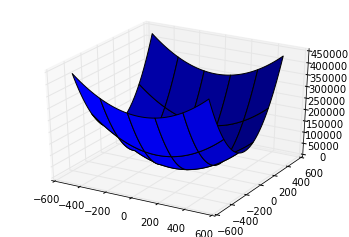

In [77]:
def f(x):
    return 0.5 * x[0]**2 + 1.25 * x[1]**2

xmesh, ymesh = np.mgrid[-500:500:50j, -500:500:50j]

fig = plt.figure()
ax = fig.gca(projection="3d")

fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

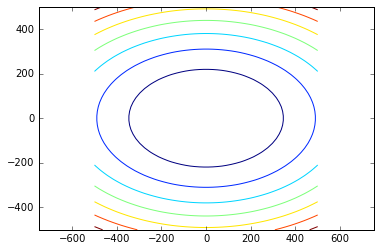

In [78]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)

### Metody bezpośrednich poszukiwań

Tak jak w przypadku optymalizacji funkcji jednej zmiennej metody bezpośrednich poszukiwań korzystają wyłącznie z wartości funkcji w punktach, w przeciwieństwie do metod gradientowych, które dodatkowo wykorzystują pochodne funkcji.

#### Metoda hipersześcienna
Algorytm potrzebuje w pojedyńczej iteracji 2^N+1 punktów, z czego 2^N punktów to są wierzchołki hipersześcianu scentrowanego na pozostałym punktcie. Porównnuje się wartości funkcji we wszystkich tych punktach i wskazuje się najlepszy (z najmniejszą wartością). W następnej iteracji tworzy się sześcian wokół tego najlepszego punktu. Jeśli najlepszym punktem okaże się punkt, który był środkiem danego hipersześcianu, wówczas zmniejsza się rozmiar sześcianu. Proces ten kontynuuje się aż hipersześcian stanie się dostatecznie mały.

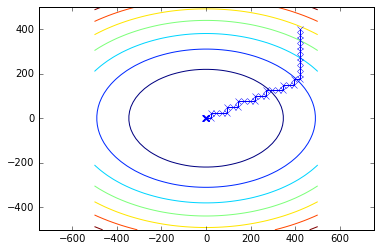

In [117]:
x0 = np.array([420, 400])
delta = np.array([50, 50])
e = 0.01

xk = x0

X = np.array(x0)
while np.linalg.norm(delta) > e:
    d = delta/2.0
    hsquare = np.array([
            xk,
            xk + np.array([-d[0], 0]),
            xk + np.array([d[0], 0]),
            xk + np.array([0, -d[1]]),
            xk + np.array([0, d[1]]),
            #xk + np.array([d[0], d[1]]),
            #xk + np.array([-d[0], d[1]]),
            #xk + np.array([d[0], -d[1]]),
            #xk + np.array([-d[0], -d[1]]),
        ])
    nxk = hsquare[np.argmin(f(hsquare.T))]
    if nxk[0] == xk[0] and nxk[1] == xk[1]:
        delta = d
    xk = nxk
    X = np.vstack([X, xk])

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)
pt.plot(X.T[0], X.T[1], "x-")

## Metody gradientowe
Gradient w punkcie $x^{(t)}$ możemy przybliżyć numerycznie za pomocą następującej formuły:
$$\bigtriangledown f(x^{(t)}) =\begin{bmatrix}
  \frac{\delta f(x^{(t)})}{\delta x_1}\\
  \frac{\delta f(x^{(t)})}{\delta x_2}\\
  ...\\
  \frac{\delta f(x^{(t)})}{\delta x_N}\\
 \end{bmatrix}, gdzie \frac{\delta f(x^{(t)})}{\delta x_i} = \frac{f_i(x^{(t)}+\delta x_i^{(t)}) - f_i(x^{(t)}-\delta x_i^{(t)})}{2 \delta x_i^{(t)}}$$

Hesjan w punkcie $x^{(t)}$ liczymy następująco:

$$\bigtriangledown f(x^{(t)}) =\begin{bmatrix}
  \frac{\delta^2 f(x^{(t)})}{\delta x_1^2} & \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_N}\\
  \frac{\delta^2 f(x^{(t)})}{\delta x_1 \delta x_2} & \frac{\delta^2 f(x^{(t)})}{\delta x_2^2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_2 \delta x_N}\\
  ... & ... & ... & .. \\
    \frac{\delta^2 f(x^{(t)})}{\delta x_N \delta x_1} & \frac{\delta^2 f(x^{(t)})}{\delta x_N \delta x_2} & ... & \frac{\delta^2 f(x^{(t)})}{\delta x_N^2}\\
 \end{bmatrix},$$
 
 gdzie:
 
$$\frac{\delta^2 f(x^{(t)})}{\delta x_i^2} = \frac{f_i(x^{(t)}+\delta x_i^{(t)}) - 2f(x^{(t)}) + f_i(x^{(t)}-\delta x_i^{(t)})}{(\delta x_i^{(t)})^2}$$

$$\frac{\delta^2 f(x^{(t)})}{\delta x_i \delta x_j} = \frac{\frac{\delta f(x_i^{(t)} + \delta x_i^{(t)})}{\delta x_j}-\frac{\delta f(x_i^{(t)} - \delta x_i^{(t)})}{\delta x_j}}{2 \delta x_i^{(t)}}$$

Pochodne cząstkowe w ostatnim wyrażeniu powyżej są z kolei liczone tak, jak składowe gradientu, tylko że w innym punkcie. Wyrażenie $x_i^{(t)} + \delta x_i^{(t)}$ reprezentuje wektor $(x_1^{(t)}, ..., x_i^{(t)}, ..., x_N^{(t)})^T$
Żeby policzyć gradient potrzebnyhc jest $2N$ różnych wartości funkcji. A żeby policzyć Hesjan potrzebnych jest $3N + 4 \begin{pmatrix}N\\2\\ \end{pmatrix} = 2 N^2 + N$.
Ponieważ gradient jest kierunkiem najszybszego wzrostu, minus gradient
jest kierunkiem najszybszego spadku funkcji. Kierunek poszukiwań (ang.
search direction) $d^{(t)}$ jest kierunkiem spadku w punkcie $x^{(t)}$, jeśli w otoczeniu tego punktu spełniony jest następujący warunek:

$$\bigtriangledown f(x^{(t)}) \cdotp d^{(t)} \leq 0$$

Oznacza to, że cosinus kąta między gradientem i kierunkiem poszukiwań
jest większy niż $90^o$. Kierunek $d^{(t)}$ jest kierunkiem spadku, ponieważ w wyniku rozwinięcia f wokół $x^{(t)}$ otrzymujemy:
$$ f(x^{(t+1)})=f(x^{(t)}+\alpha d^{(t)})= f(x^{(t)} + \alpha \bigtriangledown f(x^{(t)}) \cdotp d^{(t)}$$

Im niższa ujemna wartość $\bigtriangledown f(x^{(t)}) \cdotp d^{(t)}$ tym większy spadek funkcji w kierunku $d^{(t)}$.
W metodach gradientowych często w ramach pojedynczej iteracji dokonuje
się poszukiwań w danym kierunku. Jest to optymalizacja jednowymiarowa. Najpierw zapisujemy reprezentatywny punkt wzdłuż kierunku $s^{(t)}$ jako:
$$x^{(k+1)} = x^{(k)}+\alpha^{(k)} s^{(k)}$$

gdzie $\alpha^{(k)}$ jest długością kroku. Ponieważ $x^{(k)}$ i $s^{(k)}$ są znane, punkt $x^{(k+1)}$ zapisać tylko jedną zmienną. Można więc wykonać minimalizację jednowymiarową, aby otrzymać nowy punkt $x^{(k+1)}$. Następnie poszukiwania kontynuuje się wzdłuż nowego kierunku $s^{(k+1)}$ i tak dalej aż do momentu znalezienia lokalnego minimum. Jeśli metoda gradientowa jest użyta do poposzukiwań jednowymiarowych wzdłuż kierunku, minimum znajdujemy poprzez zróżniczkowanie wyrażenia $f(x^{(k+1)}) = f(x^{(k+1)}+\alpha s^{(k)})$ względem $\alpha$ i przyrównaniem do zera:
$$\bigtriangledown f(x^{(k+1)} \cdotp s^{(k)} = 0$$.

W ten sposób znajdujemy nowy punkt $x^{(k+1)}$. Okazuje się że kąt pomiędzy kierunkiem poszukiwań w k-tej iteracji i kierunkiem najszybszego spadku w nowym punkcie $\bigtriangledown f(x^{(k+1)}$ jest równy $90^o$.

#### Metoda Cauchy'ego najszybszego spadku
Kierunek poszukiwań w metodzie Cauchy’ego jest kierunkiem najszybszego
spadku:

$$s^{(k)} = -\bigtriangledown f(x^{(k)}).$$

Algorytm ten gwarantuje poprawę, to jest spadek wartości funkcji, w każdej
iteracji. Metoda najszybszego spadku działa dobrze, gdy $x^{(0)}$ jest daleko od minimum $x^*$. Jeśli bieżący punkt jest blisko minimum, zmiana gradientu jest mała, wobec następny punkt powstały w wyniku poszukiwania w jednym kierunku jest blisko punktu bieżącego.

In [14]:
def sign(a):
    if a > 0:
        return 1.0
    elif a == 0:
        return 0.0
    else:
        return -1.0;
    
def get_gradient(f, X, delta):
    X = np.array(X)
    for i in range(len(X)):
        X[i] = (f(X[i] + delta) - f(X[i] - delta)) / 2.0 * delta
    return X

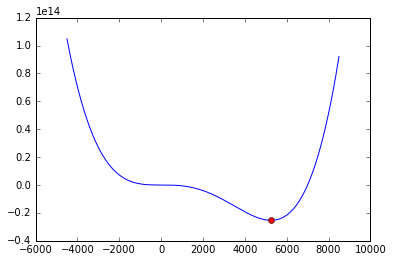

In [15]:
M = 100

X = b

delta = 0.001
alpha_max = 100

e1 = 0.01
e2 = 0.01

for k in xrange(M):
    grad = get_gradient(f, [X], delta)[0]

    if abs(grad) <= e1:
        break
        
    alpha = np.argmin(f(X - np.arange(alpha_max) * sign(grad)))
    
    Xn = X - alpha * sign(grad)
   
    if abs(Xn - X) / abs(X) <= e1:
        break
    
    X = Xn

X = np.array(X)
plt.plot(x, f(x))
plt.plot(X, f(X), "ro")
plt.show()